<Axes: >

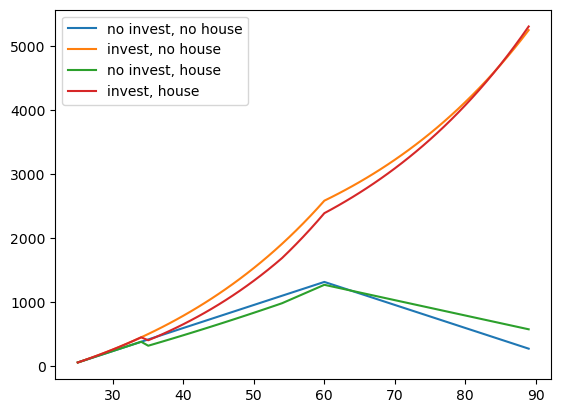

In [21]:
# Created by Chris Tien

import pandas as pd
%matplotlib inline

#變數單位(萬)
起始資金 = 20
每月薪水 = 6
每月開銷 = 2 # 不含房租
每月房租 = 1
退休年齡 = 60
預測時段 = range(25, 90, 1)

# 每年淨額
每年淨額 = pd.Series(0, index=預測時段)
每年淨額.iloc[0] = 起始資金
每年淨額.loc[0:退休年齡] = 每年淨額.loc[0:退休年齡] + 每月薪水 * 12
每年淨額 = 每年淨額 - (每月開銷 + 每月房租) * 12

# 無投資總資產
無投資總資產 = 每年淨額.cumsum()

# 投資資產
投資部位 = 0.7
投資年利率 = 5
def compound_interest(arr, ratio, return_rate):
    ret = [arr.iloc[0]]
    # print(ret) # 42萬
    for v in arr[1:]:
        ret.append(ret[-1] * ratio * (return_rate/100+1) + ret[-1] * (1 - ratio) + v)
    return pd.Series(ret, 預測時段)
投資總資產 = compound_interest(每年淨額, 投資部位, 投資年利率)

# 買房
買房價格 = 300
買房頭期款 = 100
買房年紀 = 35
房貸利率 = 3
貸款年數 = 20
買房花費 = pd.Series(0, index=預測時段)
買房花費[買房年紀] = 買房頭期款
買房花費.loc[買房年紀:買房年紀+貸款年數-1] = 買房花費.loc[買房年紀:買房年紀+貸款年數-1] + (買房價格 - 買房頭期款) / 貸款年數
# 欠款+利息
欠款 = pd.Series(0, index=預測時段)
欠款[買房年紀] = 買房價格
欠款 = 欠款.cumsum()
欠款 = 欠款 - 買房花費.cumsum()
利息 = 欠款.shift().fillna(0) * 房貸利率 / 100

# 繳房租
房租年繳 = pd.Series(每月房租*12, index=預測時段)
房租年繳.loc[買房年紀:] = 0
每年淨額_買房 = pd.Series(0, index=預測時段)
每年淨額_買房.iloc[0] = 起始資金
每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)

# 匯總圖表
pd.DataFrame({
    'no invest, no house': 每年淨額.cumsum(),
    'invest, no house': compound_interest(每年淨額, 投資部位, 投資年利率),
    'no invest, house': 每年淨額_買房.cumsum(),
    'invest, house': compound_interest(每年淨額_買房, 投資部位, 投資年利率), 
}).plot()